# Proje 2 - Scikit-learn ile Makine Öğrenmesi

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi 09.07.2021 Cuma saat 15:00’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 12.07.2021 Pazartesi saat 15:00’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir.
* Projeler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu projelerin notunda aynı oranda kesinti yapılacaktır veya bu projeler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  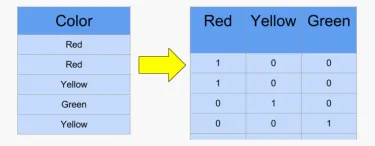
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Kullandığım metricleri kısaca açıklamam gerekirse(Sınıflandırma, Regresyonda ve Clustering'de); 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('insan_kaynaklari.csv')

In [116]:
print(np.abs(data.corr().iloc[:,0]).sort_values(ascending=False))
#Memnuniyet düzeni ile arasında korelasyon olan değişkenleri almanın daha doğru olduğunu düşünüyorum.
#
data.head()

memnuniyet_duzeyi                1.000000
sirketten_ayrildi                0.388375
gerceklestirdigi_proje_sayisi    0.142970
aldigi_degerlendirme_puani       0.105021
sirkette_calistigi_yil_sayisi    0.100866
is_kazasina_ugradi               0.058697
son_5_yilda_terfi_aldi           0.025605
aylik_ort_calisma_saati          0.020048
Name: memnuniyet_duzeyi, dtype: float64


,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

### Linear Regression

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [128]:
X = data.filter(items = ['aldigi_degerlendirme_puani','gerceklestirdigi_proje_sayisi','aylik_ort_calisma_saati','sirketten_ayrildi','son_5_yilda_terfi_aldi'])
Y = data['memnuniyet_duzeyi']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [129]:
linear = LinearRegression()
linear.fit(X_train,y_train)
yHat = linear.predict(X_test)

R2: 0.19920779516746823
S-MSE: 0.22302808172336214
MAE 0.18056345331130247


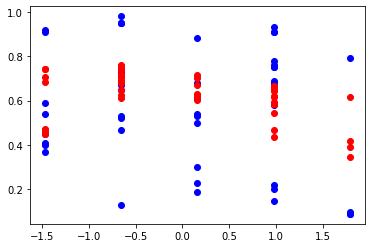

In [131]:
print("R2:",r2_score(y_test, yHat)) # olduça kötü bağlam yok
print("S-MSE:",np.sqrt(mean_squared_error(y_test, yHat)))
print("MAE",mean_absolute_error(y_test, yHat))
plt.scatter(X_test[:50,1],y_test[:50],color='blue')
plt.scatter(X_test[:50,1],yHat[:50],color = 'red')

In [132]:
print("CV-MSE",-cross_val_score(linear,X,Y,cv=10,scoring = "neg_mean_squared_error").mean())
print("CV-MAE",-cross_val_score(linear,X,Y,cv=10,scoring = "neg_mean_absolute_error").mean())


CV-MSE 0.05007412750475575
CV-MAE 0.18047590075916745


### PLS


In [133]:
from sklearn.cross_decomposition  import PLSRegression,PLSSVD # boşu boşuna yaptım bi işe yaramıyormuş :D 

In [134]:
Pls_parameters = {'n_components':range(1,10)}
pls = PLSRegression() #PLS i seçme sebebim elimdeki veriyi pca ile daraltarak çıkarım elde etmeye çalıştım işe yaramadı daha sonra sabit tutarak denedim yinede işe yaramadı
plsCV = GridSearchCV(pls,Pls_parameters,cv=5) 
plsCV.fit(X_train,y_train)
yHat = plsCV.predict(X_test)

In [135]:
print("R2:",r2_score(y_test, yHat)) 
print("S-MSE:",np.sqrt(mean_squared_error(y_test, yHat)))
print("MAE",mean_absolute_error(y_test, yHat)) 


R2: 0.19920779516746823
S-MSE: 0.22302808172336214
MAE 0.18056345331130247


### NN

In [136]:
NN_regressor = MLPRegressor()
NN_parameters = {'hidden_layer_sizes':range(10,100,10),'activation':['logistic','relu','tanh'],'max_iter':range(150,350,50)} ## muhtemelen logistic en iyisi olucak
NN_regressorCV = GridSearchCV(NN_regressor,NN_parameters,cv=3)
NN_regressorCV.fit(X_train,y_train) #NN' de norm zorunlu  
print(NN_regressorCV.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 70, 'max_iter': 300}


In [137]:
yHat = NN_regressorCV.predict(X_test)
print("R2:",r2_score(y_test, yHat)) #nispeten r2 yi arttırdık Linear Reg. a göre daha anlamlı bir model 
print("S-MSE:",np.sqrt(mean_squared_error(y_test, yHat)))
print("MAE",mean_absolute_error(y_test, yHat)) #nispeten abs error ve mse de daha iyi 
print("Test olarak ayırdığım veriyi Burada Karşılaştırmayı Doğru Buldum.")
print("yHat:\t",yHat[:5])
print("True:\t",y_test[:5].values)

R2: 0.4054694117046522
S-MSE: 0.19217050544735195
MAE 0.1488446151638636
Test olarak ayırdığım veriyi Burada Karşılaştırmayı Doğru Buldum.
yHat:	 [0.6311471  0.7090848  0.56501154 0.61511564 0.19403007]
True:	 [0.92 0.73 0.59 0.69 0.09]


### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score,plot_confusion_matrix,accuracy_score

In [28]:
data = pd.read_csv('insan_kaynaklari.csv')

In [29]:
print(np.abs(data.corr().iloc[:,-2]).sort_values(ascending=False))

sirketten_ayrildi                1.000000
memnuniyet_duzeyi                0.388375
is_kazasina_ugradi               0.154622
sirkette_calistigi_yil_sayisi    0.144822
aylik_ort_calisma_saati          0.071287
son_5_yilda_terfi_aldi           0.061788
gerceklestirdigi_proje_sayisi    0.023787
aldigi_degerlendirme_puani       0.006567
Name: sirketten_ayrildi, dtype: float64


In [30]:
X,y = data.filter(items = ['memnuniyet_duzeyi','is_kazasina_ugradi','sirkette_calistigi_yil_sayisi']),data['sirketten_ayrildi']
for col in X.columns:
    X[col] = (X[col]-X[col].mean())/ X[col].std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(y_test.value_counts())

0    2320
1     680
Name: sirketten_ayrildi, dtype: int64


Best Hyperparameters: {'C': 0.10101010101010101}
Acc: 0.7628962414895095
F1 Score: 0.3186705767350929
Precision: 0.4752186588921283
Recall: 0.23970588235294119


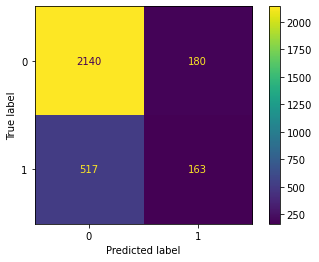

In [32]:
grid = {"C":np.linspace(0,10,100)} #aslında diğer optimizasyon algoritmalarını girdirebilirdim fakat
lr = LogisticRegression()       # algoritmaların cezalandırma fonksiyonları çakıştığı için izin vermiyor
lr.get_params()
lrCv = GridSearchCV(lr,grid,cv=5) # manuel olarak denememiz gerekiyor.
lrCv.fit(X_train,y_train)

print("Best Hyperparameters:",lrCv.best_params_)
print("Acc:",lrCv.best_score_)
print("F1 Score:",f1_score(y_test,lrCv.predict(X_test))) #performans oldukça kötü
print("Precision:",precision_score(y_test,lrCv.predict(X_test)))
print("Recall:",recall_score(y_test,lrCv.predict(X_test)))    
plot_confusion_matrix(lrCv, X_test, y_test)
plt.show()


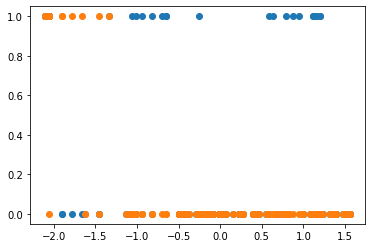

In [33]:
yHat = lrCv.predict(X_test)
plt.scatter(X_test.iloc[:100,0],y_test[:100])
plt.scatter(X_test.iloc[:100,0],yHat[:100])
plt.show()
#İşten çıkarmalımadı doğrulu oldukça yeterli fakat çıkarıldıda veri seti yoğunluğu çıkarılmadıya nazaran
#az olduğu için model yanlı bir cevap veriyor.
#Bunu düzeltmek için ya işten çıkarma verisini arttırmamız gerekiyor veya çıkarılmama versini azaltarak
#yanlılığı bir nebze olsun azaltmamız gerekiyor.

In [34]:
from sklearn.neural_network import MLPClassifier


In [35]:
NN_classifier = MLPClassifier()
NN_parameters = {'hidden_layer_sizes':[130]}#max_iter':range(100,250,25) 
NN_classifierCV = GridSearchCV(NN_classifier,NN_parameters,cv=5)
NN_classifierCV.fit(X_train,y_train) #NN' de norm zorunlu gibi bişey 
print(NN_classifierCV.best_params_)

{'hidden_layer_sizes': 130}


Best Hyperparameters: {'hidden_layer_sizes': 130}
Acc: 0.9403287828261775
F1 Score: 0.8631578947368422
Precision: 0.825503355704698
Recall: 0.9044117647058824


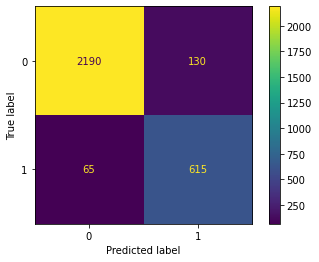

In [36]:
print("Best Hyperparameters:",NN_classifierCV.best_params_)
print("Acc:",NN_classifierCV.best_score_)
print("F1 Score:",f1_score(y_test,NN_classifierCV.predict(X_test)))
print("Precision:",precision_score(y_test,NN_classifierCV.predict(X_test)))
print("Recall:",recall_score(y_test,NN_classifierCV.predict(X_test)))
plot_confusion_matrix(NN_classifierCV, X_test, y_test)
plt.show()
#yanlılık sorununu NN ile çözebildik.

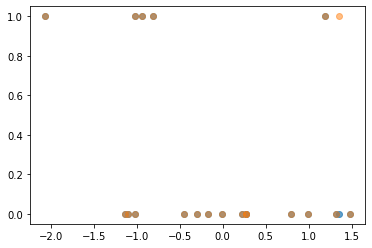

In [37]:
yHat = NN_classifierCV.predict(X_test)
plt.scatter(X_test.iloc[:20,0],y_test[:20], alpha=0.7)
plt.scatter(X_test.iloc[:20,0],yHat[:20], alpha=0.5)
plt.show() ## Kahverengiye kaçan renkler doğruluğu açıkça gösteriyor.

### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score,plot_confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
LabelEncode = LabelEncoder()

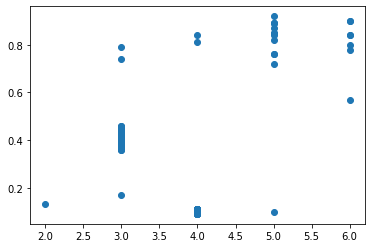

In [83]:
data = pd.read_csv('insan_kaynaklari.csv')
data['maas_derecesi'] = LabelEncode.fit_transform(data['maas_derecesi'])
data['calistigi_bolum'] = LabelEncode.fit_transform(data['calistigi_bolum'])
X,y = data.filter(items = ['sirkette_calistigi_yil_sayisi','aylik_ort_calisma_saati','son_5_yilda_terfi_aldi','calistigi_bolum']),data['maas_derecesi']
#seçtiğim özellikler bir sonuç değil maaşı etkileyen değişkenler olduğunu düşündüğüm için bunları seçtim.
# ek olarak denemelerle en sağlıklısının bu olduğunu düşündüm
plt.scatter(X.iloc[:100,0],Y.iloc[:100])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

### KNN

In [84]:
y_train.value_counts()

1    6950
2    6122
0    1177
Name: maas_derecesi, dtype: int64

Acc: 0.5506666666666666
F1 Score: 0.46360623022300596
Precision: 0.4621926007913184
Recall: 0.46969911623827837


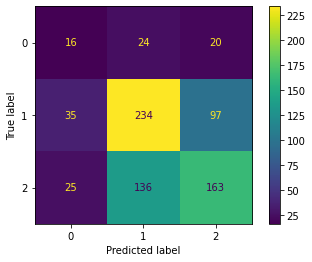

In [85]:
kNeig = KNeighborsClassifier(n_neighbors=3,weights='distance')
kNeig.fit(X_train,y_train)
print("Acc:",accuracy_score(y_test,kNeig.predict(X_test)))
print("F1 Score:",f1_score(y_test,kNeig.predict(X_test),average = 'macro'))
print("Precision:",precision_score(y_test,kNeig.predict(X_test),average = 'macro'))
print("Recall:",recall_score(y_test,kNeig.predict(X_test),average = 'macro'))
plot_confusion_matrix(kNeig, X_test, y_test)
plt.show() 


### Decisin Tree

Acc: 0.5693333333333334
F1 Score: 0.49114360267718943
Precision: 0.4967787869990184
Recall: 0.4907947109222155
[1 1 1 0 1 2 2 0 1 1]
[1 1 1 0 2 2 1 0 1 1]


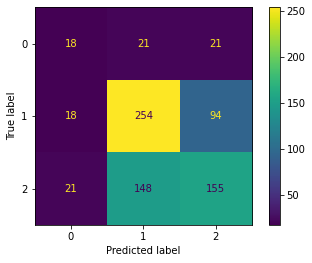

In [86]:
decisionTree = DecisionTreeClassifier(max_features='auto')
decisionTree.fit(X_train,y_train)
print("Acc:",accuracy_score(y_test,decisionTree.predict(X_test)))
print("F1 Score:",f1_score(y_test,decisionTree.predict(X_test),average = 'macro'))
print("Precision:",precision_score(y_test,decisionTree.predict(X_test),average = 'macro'))
print("Recall:",recall_score(y_test,decisionTree.predict(X_test),average = 'macro'))
plot_confusion_matrix(decisionTree, X_test, y_test)
#Çıktı Olarak Bu Kısmı Aldım
print(decisionTree.predict(X_test[:10]))
print(y_test[:10].values)
#0.label da daha fazla veri lazım sayı çok az 
plt.show() 

### Random Forest

In [87]:
randomForest = RandomForestClassifier()
RandParameters = {'n_estimators':[100,150,200,250]}
randomForestCV = GridSearchCV(randomForest,RandParameters,cv=3)
randomForestCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 150, 200, 250]})

Best Hyperparameters: {'n_estimators': 200}
Acc: 0.5463550368868053
F1 Score: 0.5118893126987584
Precision: 0.5419758887251147
Recall: 0.4961512514335829


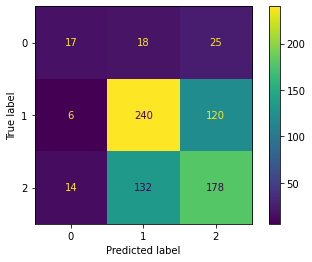

In [88]:
print("Best Hyperparameters:",randomForestCV.best_params_)
print("Acc:",randomForestCV.best_score_)
print("F1 Score:",f1_score(y_test,randomForestCV.predict(X_test),average = 'macro'))
print("Precision:",precision_score(y_test,randomForestCV.predict(X_test),average = 'macro'))
print("Recall:",recall_score(y_test,randomForestCV.predict(X_test),average = 'macro'))
plot_confusion_matrix(randomForestCV, X_test, y_test)
plt.show() 

### AdaBoost


In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
adaBoost = AdaBoostClassifier()
AdaBoostClassifier_parameters = {'n_estimators':range(10,60,10)}
adaBoostCV = GridSearchCV(adaBoost,AdaBoostClassifier_parameters,cv=3)
adaBoostCV.fit(X_train,y_train) 

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(10, 60, 10)})

Best Hyperparameters: {'n_estimators': 20}
Acc: 0.5036842474685345
F1 Score: 0.30421310601233326
Precision: 0.4851672495740293
Recall: 0.35061053767793293


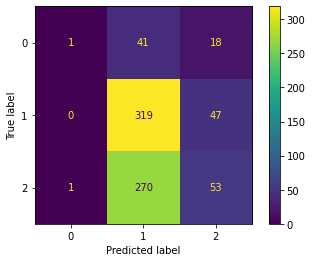

In [91]:
print("Best Hyperparameters:",adaBoostCV.best_params_)
print("Acc:",adaBoostCV.best_score_)
print("F1 Score:",f1_score(y_test,adaBoostCV.predict(X_test),average = 'macro'))
print("Precision:",precision_score(y_test,adaBoostCV.predict(X_test),average = 'macro'))
print("Recall:",recall_score(y_test,adaBoostCV.predict(X_test),average = 'macro'))
plot_confusion_matrix(adaBoostCV, X_test, y_test)
plt.show() 

### NN

In [92]:
NN_classifier = MLPClassifier(learning_rate='adaptive')
NN_parameters = {'hidden_layer_sizes':range(10,150,20),'max_iter':range(160,400,20)}#max_iter':range(100,250,25) şeklinde parametre ekleyebiliriz
NN_classifierCV = GridSearchCV(NN_classifier,NN_parameters,cv=3)
NN_classifierCV.fit(X_train,y_train) #NN' de norm zorunlu gibi bişey 

GridSearchCV(cv=3, estimator=MLPClassifier(learning_rate='adaptive'),
             param_grid={'hidden_layer_sizes': range(10, 150, 20),
                         'max_iter': range(160, 400, 20)})

Best Hyperparameters: {'hidden_layer_sizes': 90, 'max_iter': 220}
Acc: 0.5007367312786072
F1 Score: 0.20592425456857066
Precision: 0.2868679100173044
Recall: 0.33297915401740535


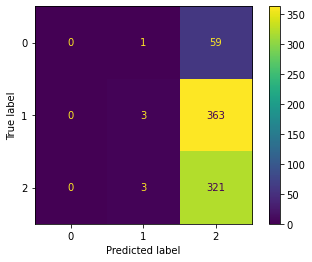

In [93]:
print("Best Hyperparameters:",NN_classifierCV.best_params_)
print("Acc:",NN_classifierCV.best_score_)
print("F1 Score:",f1_score(y_test,NN_classifierCV.predict(X_test),average = 'macro'))
print("Precision:",precision_score(y_test,NN_classifierCV.predict(X_test),average = 'macro'))
print("Recall:",recall_score(y_test,NN_classifierCV.predict(X_test),average = 'macro'))
plot_confusion_matrix(NN_classifierCV, X_test, y_test)
plt.show()



### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

In [50]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('insan_kaynaklari.csv')
data['calistigi_bolum'] = LabelEncode.fit_transform(data['calistigi_bolum'])
data['maas_derecesi'] = LabelEncode.fit_transform(data['maas_derecesi'])
data.describe()
#sirkette_calistigi_yil_sayisi sirketten_ayrildi std si oldukça düşük belki işe yarıyabilir (yetersiz kaldı saçma da düşünmüş olabilirim.(Gündüz tekrar düşün bunu) PCA e başvurdum ki uzaysal farklılıklarını bulabileyim)

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


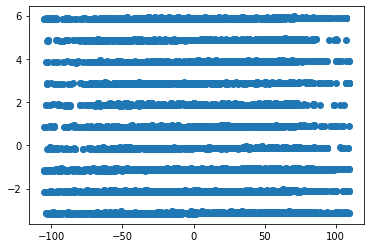

In [94]:
from sklearn.decomposition import PCA # uzaydaki ayrışımı bulmak için kullandım 
pca = PCA(n_components = 4)
pca.fit(data)
xPca = pca.transform(data)
plt.scatter(xPca[:,0],xPca[:,1])

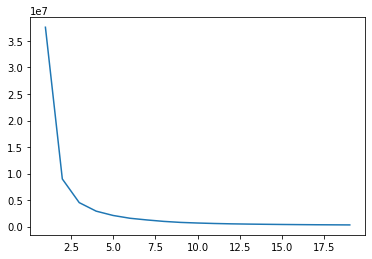

In [95]:
from sklearn.cluster import KMeans
loss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i).fit(xPca)
    loss.append(kmeans.inertia_)
plt.plot(range(1,20),loss)

#Bu noktada 4 noktası elbow olarak çalışmış 

In [96]:
kmeans = KMeans(n_clusters=4).fit(xPca)
center = kmeans.cluster_centers_

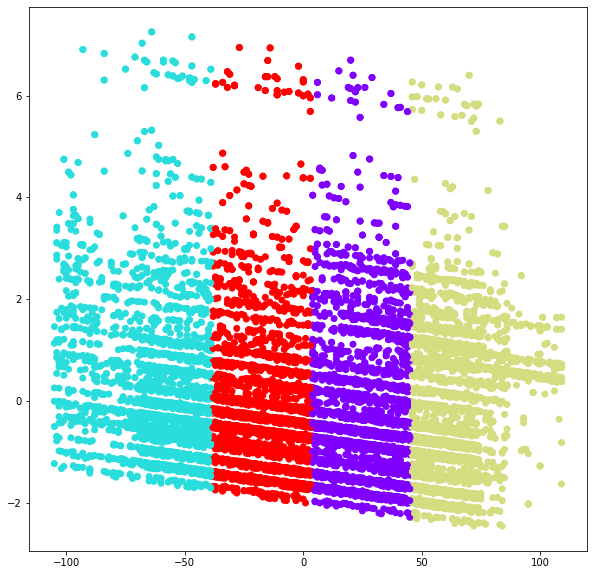

In [97]:
plt.figure(figsize=(10,10))
center = kmeans.cluster_centers_
plt.scatter(xPca[:,0],xPca[:,2],c=kmeans.labels_[:],cmap='rainbow')


In [98]:
from sklearn.cluster import AgglomerativeClustering
aggCluster = AgglomerativeClustering(n_clusters=4,linkage= 'average')#'linkage':['ward', 'complete', 'average', 'single']
aggCluster.fit(xPca) #single<ward<complete<average küme sağlığı 

AgglomerativeClustering(linkage='average', n_clusters=4)

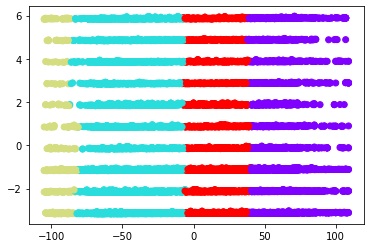

In [99]:
plt.scatter(xPca[:,0],xPca[:,1],c=aggCluster.labels_[:],cmap='rainbow')

### PCA Siz Halleri Birşey Elde Edemedim.

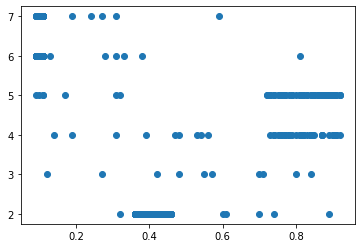

In [57]:
#veriyi seçerken sadece manuel olarak aradım herhangi bir istatistiki birşey aklıma gelmedi.
data = pd.read_csv('insan_kaynaklari.csv')
data = data.filter(items = ['memnuniyet_duzeyi','gerceklestirdigi_proje_sayisi','aylik_ort_calisma_saati','sirkette_calistigi_yil_sayisi','calistigi_bolum'])
data['calistigi_bolum'] = LabelEncode.fit_transform(data['calistigi_bolum'])
# Çeşitli featureları dahil ederek ekledim en sağlıklı cluster çalışanların benzleriğine göre sınıflandırma olduğu için insani özelliklerini almanın daha doğru olduğu düşündüm.
plt.scatter(data.iloc[:500,0],data.iloc[:500,1])


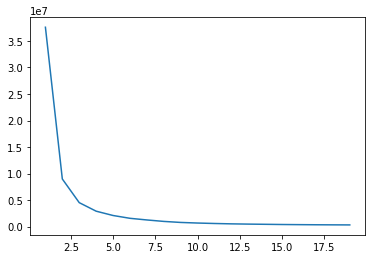

In [58]:
from sklearn.cluster import KMeans
loss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i).fit(data)
    loss.append(kmeans.inertia_)
plt.plot(range(1,20),loss)

#Bu noktada 3 noktası elbow olarak çalışmış yani kümelerer ayırmamız gerektiğinde en ayrık overfit
#olmadan oluşan küme sayımız.

In [59]:
kmeans = KMeans(n_clusters=4).fit(data)
center = kmeans.cluster_centers_

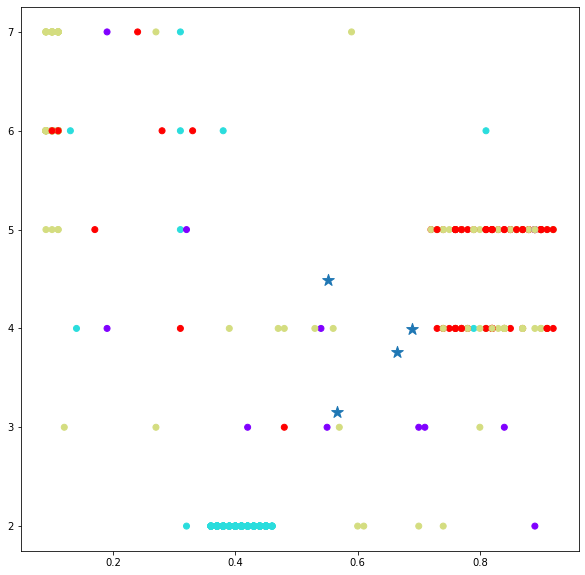

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(data.iloc[:500,0],data.iloc[:500,1],c=kmeans.labels_[:500],cmap='rainbow')
plt.scatter(center[:,0],center[:,1],marker='*',s=150)

In [61]:
from sklearn.cluster import AgglomerativeClustering
aggCluster = AgglomerativeClustering(n_clusters=3,linkage= 'average')#'linkage':['ward', 'complete', 'average', 'single']
aggCluster.fit(data) #single<ward<complete<average küme sağlığı 

AgglomerativeClustering(linkage='average', n_clusters=3)

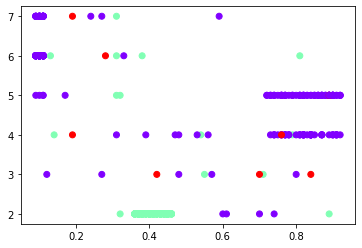

In [62]:
plt.scatter(data.iloc[:500,0],data.iloc[:500,1],c=aggCluster.labels_[:500],cmap='rainbow')